In [79]:
import pandas as pd
import re
import numpy as np

I am importing the csv. I could also use Urllib to pull form url but I like csv's. I limited the rows as I kept getting an error in row 131,000.

In [80]:
nRowsRead=100000
badstuff= pd.read_csv('Crimes.csv',nrows=nRowsRead, index_col='INC NUMBER')

I wanted all the columns to be lower case and spaces to be replaced by _. I used this replace method for it.

In [81]:
badstuff.columns = badstuff.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

I am going to see the info and describe methods to get a better idea of the data.

In [82]:
badstuff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 201600000052855 to 201700000927237
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   occurred_on         99739 non-null   object 
 1   occurred_to         71048 non-null   object 
 2   ucr_crime_category  100000 non-null  object 
 3   100_block_addr      100000 non-null  object 
 4   zip                 99997 non-null   float64
 5   premise_type        99372 non-null   object 
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


After performing the describe, I realize its the only column with floats. Hence why its the only one that appears. 

In [83]:
badstuff.describe()

,zip
count,99997.000000
mean,85045.026311
std,71.732023
min,85003.000000
25%,85016.000000
50%,85027.000000
75%,85041.000000
max,85395.000000


I want to see how many different zip codes and different places their are for this data. 

In [84]:
badstuff.zip.value_counts()

85015.0    5325
85008.0    4749
85051.0    4184
85041.0    4126
85009.0    4120
           ... 
85268.0       1
85266.0       1
85248.0       1
85226.0       1
85204.0       1
Name: zip, Length: 93, dtype: int64

In [85]:
badstuff.premise_type.value_counts()

SINGLE FAMILY HOUSE                    19527
PARKING LOT                            11296
APARTMENT                              11009
RETAIL BUSINESS                         8783
STREET / ROADWAY / ALLEY / SIDEWALK     8512
                                       ...  
GAMBLING FACILITY/CASINO/RACE TRACK        1
INDUSTRIAL SITE                            1
FARM FACILITY                              1
ABANDONED/CONDEMNED STRUCTURE              1
PARK AND RIDE                              1
Name: premise_type, Length: 89, dtype: int64

Now I want to sort the data. I am going to sort based on place.


In [86]:
badstuff.sort_values(by=['premise_type','ucr_crime_category'])

,occurred_on,occurred_to,ucr_crime_category,100_block_addr,zip,premise_type
INC NUMBER,,,,,,
201700001041461,05/25/2017 00:01,06/14/2017 19:00,BURGLARY,15XX W HATCHER RD,85021.0,ABANDONED/CONDEMNED STRUCTURE
201500002150175,11/08/2015 12:50,NaN,AGGRAVATED ASSAULT,20XX W INDIAN SCHOOL RD,85015.0,ADULT ONLY STORE / MOVIE
201600001861588,10/06/2016 17:00,10/06/2016 17:30,AGGRAVATED ASSAULT,1XX S 24TH ST,85034.0,ADULT ONLY STORE / MOVIE
201600002180336,11/24/2016 23:26,NaN,AGGRAVATED ASSAULT,19XX N BLACK CANYON FWY,85009.0,ADULT ONLY STORE / MOVIE
201600000022400,01/04/2016 10:00,01/04/2016 12:00,BURGLARY,40XX W CAMELBACK RD,85019.0,ADULT ONLY STORE / MOVIE
...,...,...,...,...,...,...
201600001593628,08/27/2016 16:06,NaN,ROBBERY,22XX E GARFIELD ST,85006.0,NaN
201600001672624,09/08/2016 14:24,09/08/2016 14:25,ROBBERY,16XX N 36TH ST,85008.0,NaN
201600001717011,09/15/2016 03:32,09/15/2016 03:32,ROBBERY,34XX W GREENWAY RD,85053.0,NaN


I am going to look at the different premises and which types of crimes are most common in each.


In [91]:
places =badstuff.groupby('premise_type')

In [92]:
places.describe()

zip                ...                  
                                 count          mean  ...      75%      max
premise_type                                          ...                  
ABANDONED/CONDEMNED STRUCTURE      1.0  85021.000000  ...  85021.0  85021.0
ADULT ONLY STORE / MOVIE          49.0  85026.204082  ...  85034.0  85051.0
AIRPORT                          481.0  85034.332640  ...  85034.0  85255.0
AMUSEMENT PARK                     3.0  85043.000000  ...  85051.0  85051.0
APARTMENT                      11008.0  85030.052144  ...  85034.0  85392.0
...                                ...           ...  ...      ...      ...
THEATRE                           29.0  85024.827586  ...  85040.0  85085.0
TRAIN STATION                     14.0  85025.500000  ...  85034.0  85041.0
UNKNOWN                          602.0  85051.915282  ...  85041.0  85395.0
VEHICLE                         5402.0  85050.190300  ...  85042.0  85392.0
WAREHOUSE / FACTORY              243.0  85031.444444  ...  85043.0  85339.0

[89 rows x 8 columns]

Import matplotlib to make graphs eventually

In [96]:
import matplotlib  as plot

Want to graph the 10 highest areas of crime in the Phoenix area.

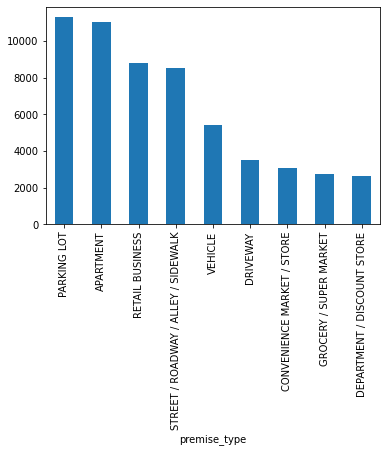

In [101]:
places.zip.count().sort_values(ascending=False).iloc[1:10].plot.bar()

Try and make a pie chart for crime in the top 10 areas of crime.

In [105]:
tally= places.zip.count().sort_values(ascending=False).iloc[1:10]

In [106]:
tally

premise_type
PARKING LOT                            11296
APARTMENT                              11008
RETAIL BUSINESS                         8783
STREET / ROADWAY / ALLEY / SIDEWALK     8512
VEHICLE                                 5402
DRIVEWAY                                3511
CONVENIENCE MARKET / STORE              3091
GROCERY / SUPER MARKET                  2729
DEPARTMENT / DISCOUNT STORE             2657
Name: zip, dtype: int64

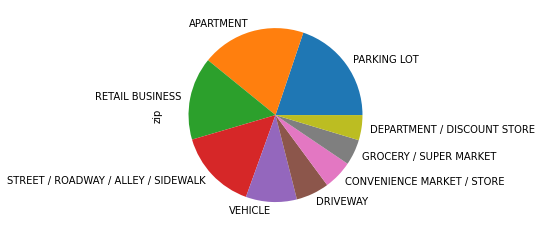

In [107]:
tally.plot.pie()

In [112]:
places.get_group('APARTMENT')

,occurred_on,occurred_to,ucr_crime_category,100_block_addr,zip,premise_type
INC NUMBER,,,,,,
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031.0,APARTMENT
201500002102927,11/01/2015 04:00,11/01/2015 10:00,LARCENY-THEFT,176XX N 7TH ST,85022.0,APARTMENT
201500002126247,11/01/2015 05:00,11/02/2015 16:00,BURGLARY,17XX W DESERT COVE AVE,85029.0,APARTMENT
201500002101936,11/01/2015 09:43,NaN,DRUG OFFENSE,9XX S 17TH AVE,85007.0,APARTMENT
...,...,...,...,...,...,...
201700000924800,05/28/2017 03:00,NaN,MOTOR VEHICLE THEFT,82XX W MCDOWELL RD,85043.0,APARTMENT
201700000933058,05/28/2017 03:45,05/28/2017 07:00,BURGLARY,45XX E BELLEVIEW ST,85008.0,APARTMENT
201700000941226,05/28/2017 08:00,05/28/2017 10:00,AGGRAVATED ASSAULT,26XX E ROOSEVELT ST,85008.0,APARTMENT


In [125]:
places.get_group('APARTMENT').nunique()

occurred_on           9653
occurred_to           7931
ucr_crime_category       9
100_block_addr        2366
zip                     60
premise_type             1
dtype: int64

Isolate the counts of crime category and graph it.

In [127]:
places.get_group('APARTMENT').groupby('ucr_crime_category').zip.count()

ucr_crime_category
AGGRAVATED ASSAULT                       1537
ARSON                                      32
BURGLARY                                 2927
DRUG OFFENSE                              413
LARCENY-THEFT                            4082
MOTOR VEHICLE THEFT                      1354
MURDER AND NON-NEGLIGENT MANSLAUGHTER      33
RAPE                                      375
ROBBERY                                   255
Name: zip, dtype: int64

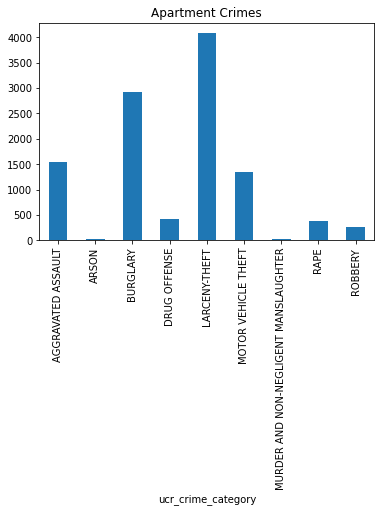

In [129]:
places.get_group('APARTMENT').groupby('ucr_crime_category').zip.count().plot.bar(title='Apartment Crimes')